# Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the data set


In [4]:
train = pd.read_csv("loan_train.csv")
test = pd.read_csv("loan_test.csv")

In [5]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [7]:
print(train.shape, test.shape)

(614, 12) (367, 11)


#  EDA


In [8]:
train.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## Categorical Variable 

### Gender

In [10]:
train.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

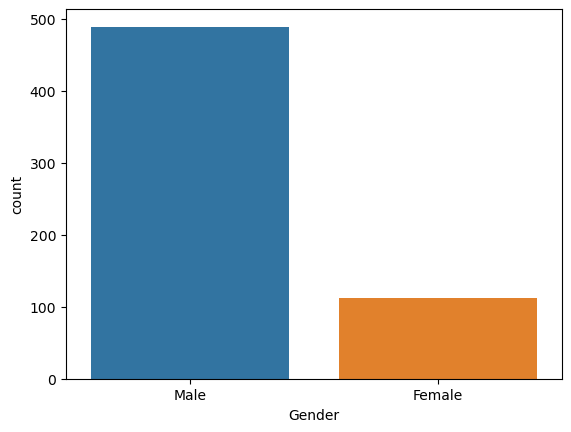

In [11]:
sns.countplot(x="Gender", data = train)
plt.show()

In [12]:
count_male = len(train[train.Gender == 'Male'])
count_female = len(train[train.Gender == 'Female'])
count_null = len(train[train.Gender.isnull()])

print("Percentage of Male applicant: {:.2f} %".format((count_male / (len(train.Gender))*100)))
print("Percentage of Female applicant: {:.2f} %".format((count_female / (len(train.Gender))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Gender))*100)))

Percentage of Male applicant: 79.64 %
Percentage of Female applicant: 18.24 %
Missing values percentage: 2.12 %


We can observe that the number of male applicants is higher compared to female applicants. Also there are missing values in this column.

### Married

In [13]:
train.Married.value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

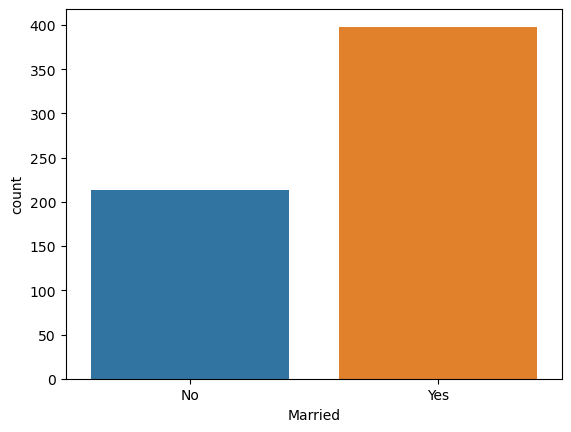

In [14]:
sns.countplot(x = "Married", data = train)
plt.show()

Number of applicants that has been married is significantly higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column as well.

In [15]:
count_married = len(train[train.Married == 'Yes'])
count_non_married = len(train[train.Married == 'No'])
count_null = len(train[train.Married.isnull()])

print("Percentage of married: {:.2f} %".format((count_married / (len(train.Married))*100)))
print("Percentage of Non married applicant: {:.2f} %".format((count_non_married / (len(train.Married))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Married))*100)))

Percentage of married: 64.82 %
Percentage of Non married applicant: 34.69 %
Missing values percentage: 0.49 %


### Education

In [16]:
train.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

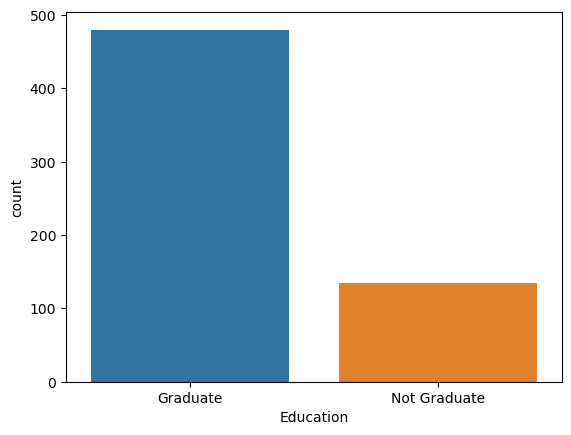

In [17]:
sns.countplot(x = "Education", data = train)
plt.show()

In [18]:
count_graduate = len(train[train.Education == 'Graduate'])
count_not_graduate = len(train[train.Education == 'Not Graduate'])
count_null = len(train[train.Education.isnull()])

print("Percentage of graduate applicant: {:.2f} %".format((count_graduate / (len(train.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f} %".format((count_not_graduate / (len(train.Education))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Education))*100)))

Percentage of graduate applicant: 78.18 %
Percentage of Not graduate applicant: 21.82 %
Missing values percentage: 0.00 %


The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### Self Employed

In [19]:
train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

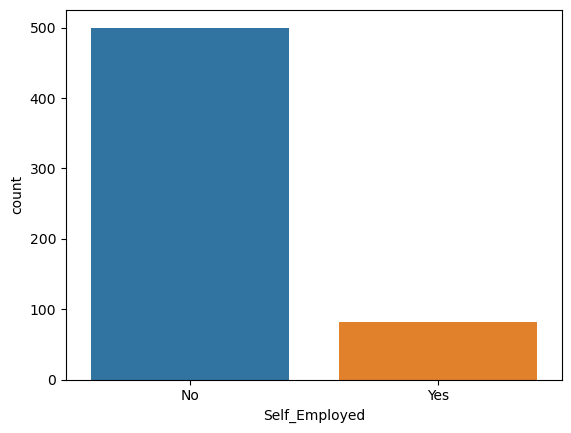

In [20]:
sns.countplot(x = "Self_Employed", data = train)
plt.show()

In [21]:
count_no = len(train[train.Self_Employed == 'No'])
count_yes = len(train[train.Self_Employed == 'Yes'])
count_null = len(train[train.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f} %".format((count_no / (len(train.Self_Employed))*100)))
print("Percentage of self employed: {:.2f} %".format((count_yes / (len(train.Self_Employed))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Self_Employed))*100)))

Percentage of Not self employed: 81.43 %
Percentage of self employed: 13.36 %
Missing values percentage: 5.21 %


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### Credit History

In [22]:
train.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

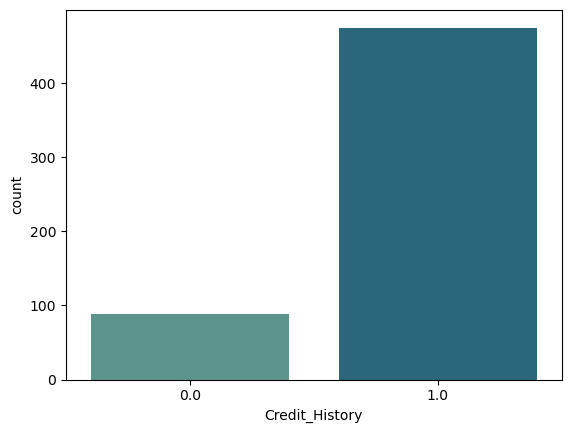

In [23]:
sns.countplot(x = "Credit_History", data = train, palette = "crest")
plt.show()

In [24]:
count_1 = len(train[train.Credit_History == 1])
count_0 = len(train[train.Credit_History == 0])
count_null = len(train[train.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f} %".format((count_1 / (len(train.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f} %".format((count_0 / (len(train.Credit_History))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Credit_History))*100)))

Percentage of Good credit history: 77.36 %
Percentage of Bad credit history: 14.50 %
Missing values percentage: 8.14 %


👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### Property Area

In [25]:
train.Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64

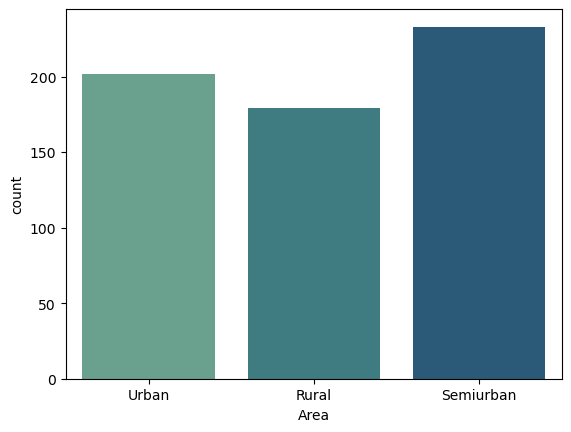

In [26]:
sns.countplot(x = "Area", data = train, palette="crest")
plt.show()

In [27]:
count_urban = len(train[train.Area == 'Urban'])
count_rural = len(train[train.Area == 'Rural'])
count_semi_urban = len(train[train.Area == 'Semiurban'])
count_null = len(train[train.Area.isnull()])

print("Percentage of Urban: {:.2f} %".format((count_urban / (len(train.Area))*100)))
print("Percentage of Rural: {:.2f} %".format((count_rural / (len(train.Area))*100)))
print("Percentage of Semiurban: {:.2f} %".format((count_semi_urban / (len(train.Area))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Area))*100)))

Percentage of Urban: 32.90 %
Percentage of Rural: 29.15 %
Percentage of Semiurban: 37.95 %
Missing values percentage: 0.00 %


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

### Loan Status

In [28]:
train.Status.value_counts(dropna=False)

Y    422
N    192
Name: Status, dtype: int64

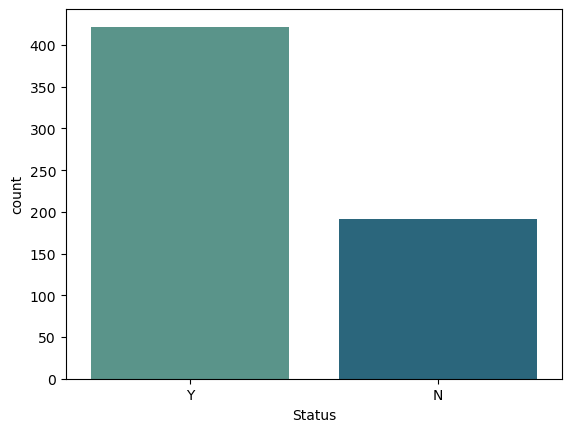

In [29]:
sns.countplot(x = "Status", data = train, palette = "crest")
plt.show()

In [30]:
count_Y = len(train[train.Status == 'Y'])
count_N = len(train[train.Status == 'N'])
count_null = len(train[train.Status.isnull()])

print("Percentage of Approved: {:.2f} %".format((count_Y / (len(train.Status))*100)))
print("Percentage of Rejected: {:.2f} %".format((count_N / (len(train.Status))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Status))*100)))

Percentage of Approved: 68.73 %
Percentage of Rejected: 31.27 %
Missing values percentage: 0.00 %


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### Loan Amount Term

In [31]:
train.Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64

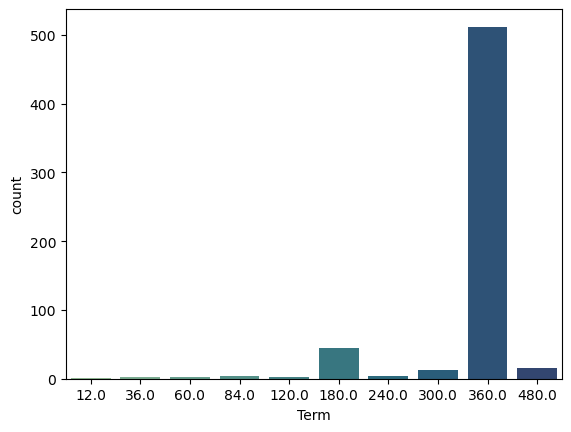

In [32]:
sns.countplot(x = "Term", data = train, palette = "crest")
plt.show()

In [33]:
train.Term.value_counts()/len(train) * 100

360.0    83.387622
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: Term, dtype: float64

As can be seen from the results, the 360 days loan duration is the most popular compared to others.

## Numerical Variable

### Describing Numerical Variable


In [34]:
train[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,5.403459e+05,1.621246e+05,1.414104e+07
std,6.109042e+05,2.926248e+05,8.815682e+06
min,1.500000e+04,0.000000e+00,0.000000e+00
25%,2.877500e+05,0.000000e+00,9.800000e+06
50%,3.812500e+05,1.188500e+05,1.250000e+07
75%,5.795000e+05,2.297250e+05,1.647500e+07
max,8.100000e+06,4.166700e+06,7.000000e+07


### Distribution of Numerical Variables

#### Histogram Distribution

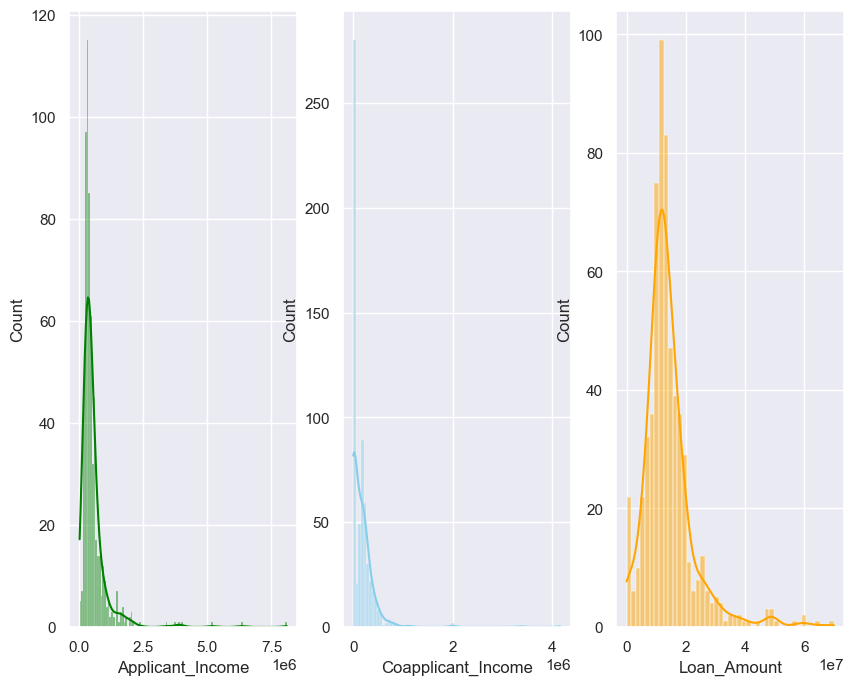

In [35]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color = 'orange');

#### Violin Plot

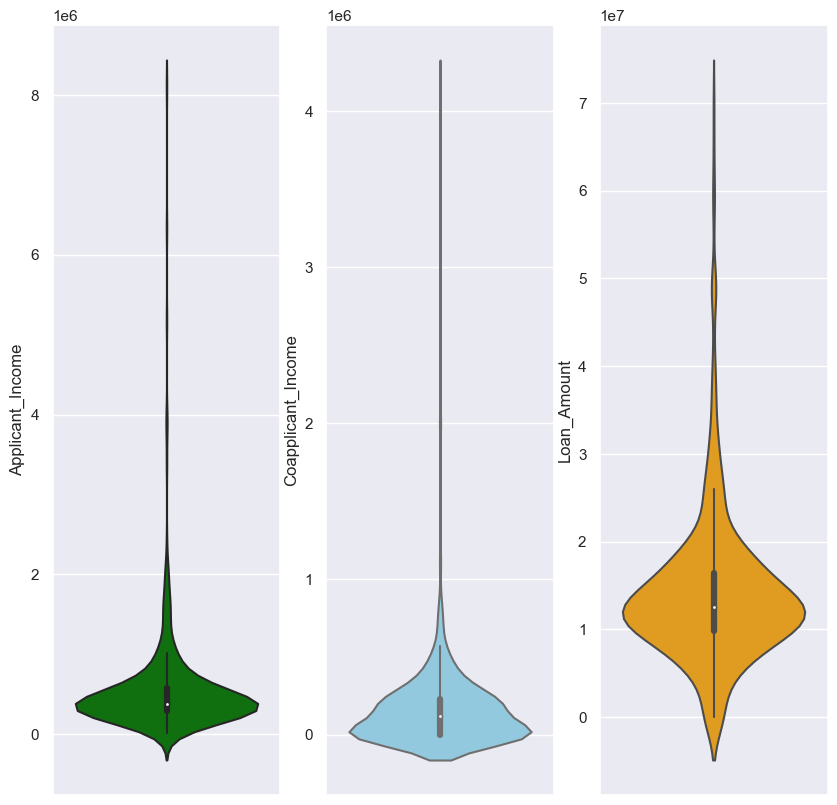

In [36]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(1, 3, figsize=(10, 10))
plt.subplot(1,3,1)
sns.violinplot(data = train, y = "Applicant_Income", color = 'green')
plt.subplot(1,3,2)
sns.violinplot(data = train, y = "Coapplicant_Income", color='skyblue')
plt.subplot(1,3,3)
sns.violinplot(data = train, y = "Loan_Amount", color='orange');

The distribution of Applicant_income, Co_Applicant Income, and Loan_Amount are positively skewed and contains outliers.

The distribution of Loan_Amount Term is negativly skewed and contain outliers as well.



## Other Viz.


### Heatmap

/var/folders/3f/y5zf37093hx4z8g6fjspk6080000gn/T/ipykernel_7688/4181361618.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True)


<Axes: >

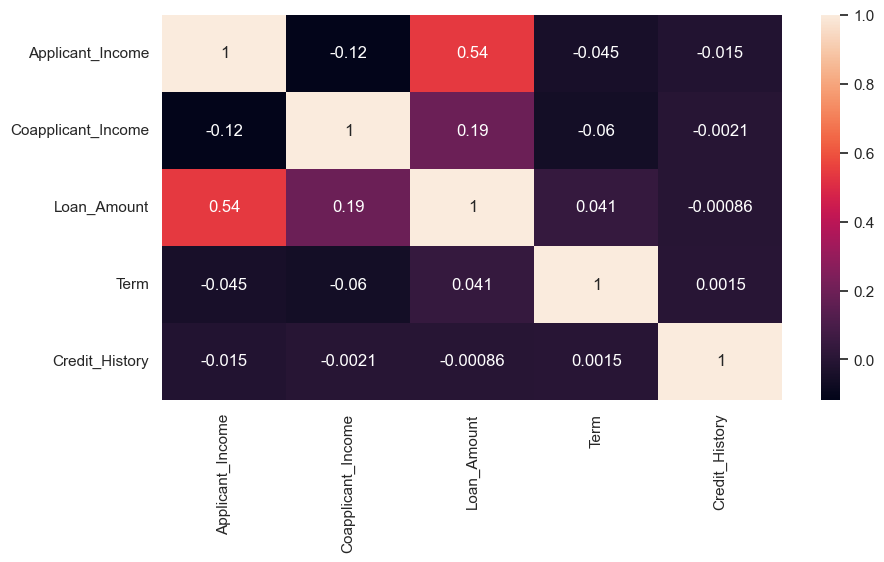

In [37]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot = True)

We observe positive correlation between Loan Amount and Applicant Income.

### Categorical v/s Categorical

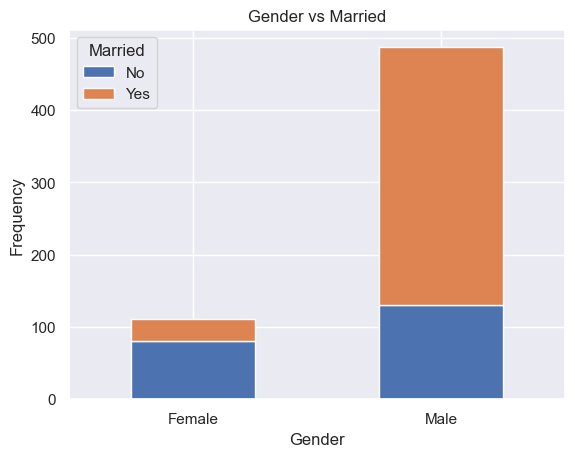

In [38]:
pd.crosstab(train.Gender, train.Married).plot(kind = "bar", stacked = True)
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

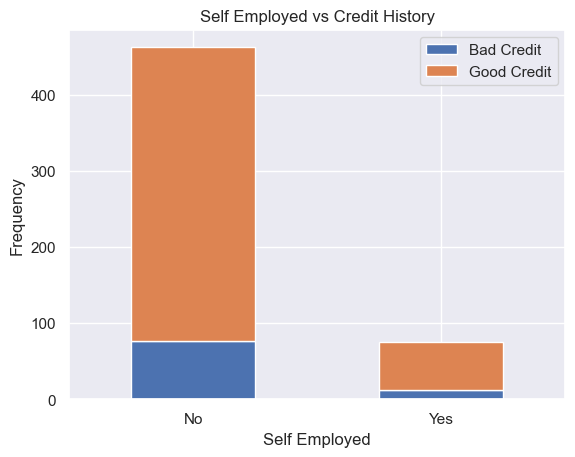

In [39]:
pd.crosstab(train.Self_Employed, train.Credit_History).plot(kind = "bar", stacked = True)
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation = 0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

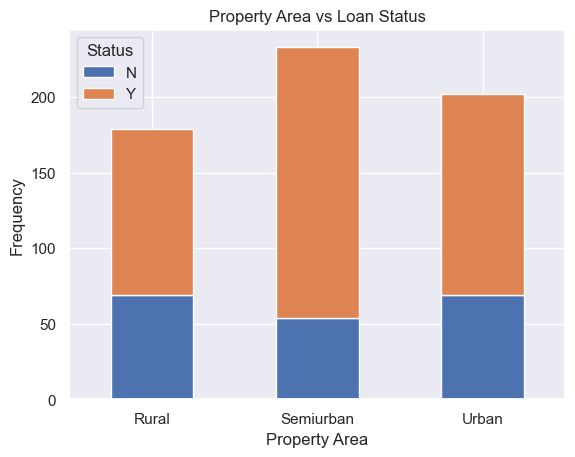

In [40]:
pd.crosstab(train.Area, train.Status).plot(kind = "bar", stacked = True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most of loans that got accepted has property in Semiurban compared to Urban and Rural.

### Categorical v/s Numerical

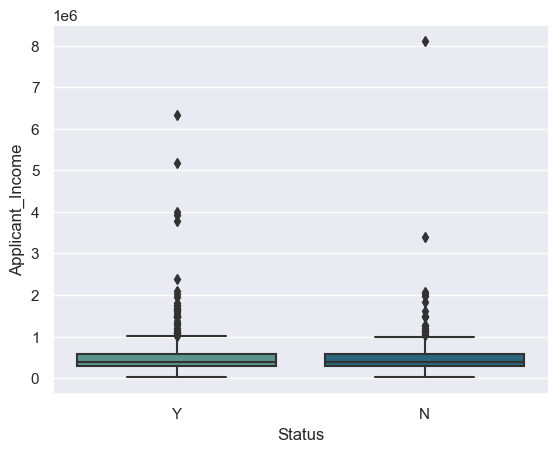

In [41]:
sns.boxplot(x = "Status", y = "Applicant_Income", data = train, palette = 'crest');

We can observe that there are lots of outliers in Applicant Income, and the distribution also positively skewed.

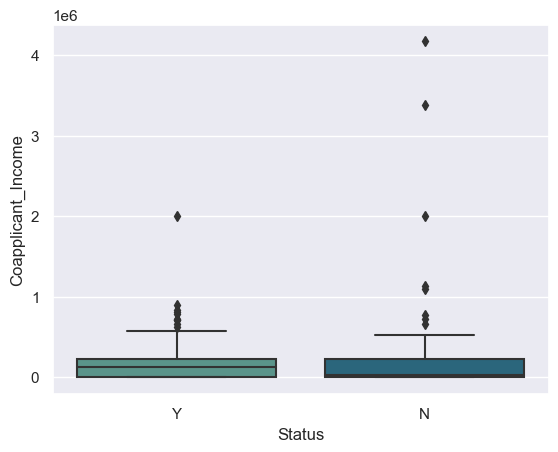

In [42]:
sns.boxplot(x = "Status", y = "Coapplicant_Income", data = train, palette="crest");

It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

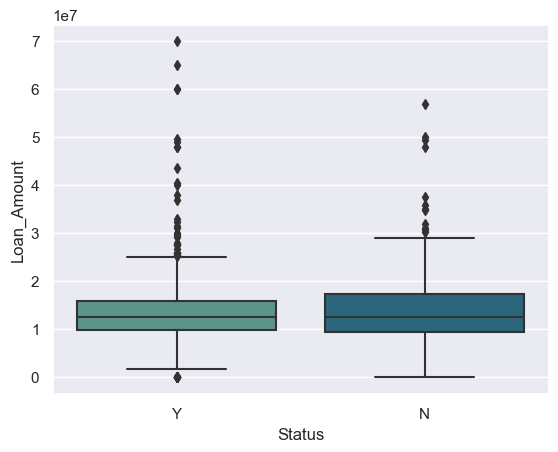

In [43]:
sns.boxplot(x = "Status", y = "Loan_Amount", data = train, palette = "crest");

We observe that Loan Amount has a high number of outliers, and the distribution is also positively skewed.

### Numerical v/s Numerical

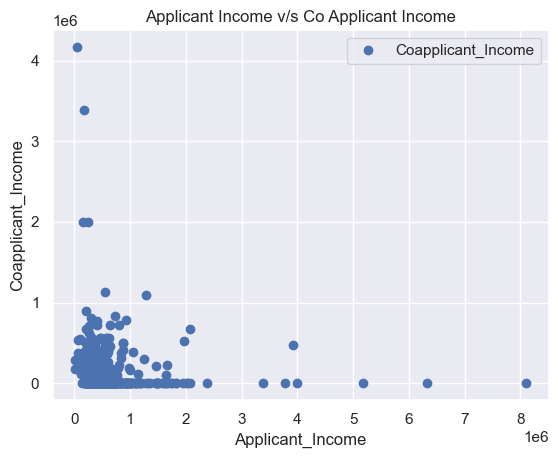

Pearson correlation: -0.11660458122889975
T knn and P value: 
 Ttest_indResult(statistic=13.835753259915663, pvalue=1.4609839484240346e-40)


In [44]:
train.plot(x = 'Applicant_Income', y = 'Coapplicant_Income', style = 'o')  
plt.title('Applicant Income v/s Co Applicant Income')  
plt.xlabel('Applicant_Income')
plt.ylabel('Coapplicant_Income')  
plt.show()
print('Pearson correlation:', train['Applicant_Income'].corr(train['Coapplicant_Income']))
print('T knn and P value: \n', stats.ttest_ind(train['Applicant_Income'], train['Coapplicant_Income']))

There exists negative correlation between Applicant income and Co Applicant Income.

The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46.


# Data Preprocessing

## Dealing with null values

In [45]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

### Data Imputation for categorical variables


In [46]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Term'].fillna(train['Term'].mode()[0],inplace = True)

Similarly we impute for the test set as well.

In [47]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Term'].fillna(test['Term'].mode()[0],inplace = True)

### Data Imputation for numerical variables

In [48]:
train['Loan_Amount'].fillna(train['Loan_Amount'].mean(),inplace = True)

In [49]:
test['Loan_Amount'].fillna(test['Loan_Amount'].mean(),inplace = True)

## One-hot Encoding

In [50]:
train = pd.get_dummies(train)

# Drop columns
train = train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
train.rename(columns = new, inplace = True)

In [51]:
test = pd.get_dummies(test)

# Drop columns
test = test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
test.rename(columns = new, inplace = True)

## Removing outliers

In [52]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1

train = train[~((train < (q1 - 1.5 * iqr)) |(train > (q3 + 1.5 * iqr))).any(axis = 1)]

In [53]:
q1 = test.quantile(0.25)
q3 = test.quantile(0.75)
iqr = q3 - q1

test = test[~((test < (q1 - 1.5 * iqr)) |(test > (q3 + 1.5 * iqr))).any(axis = 1)]

## Treating Skewness

In [54]:
# Square Root Transformation

train.Applicant_Income = np.sqrt(train.Applicant_Income)
train.Coapplicant_Income = np.sqrt(train.Coapplicant_Income)
train.Loan_Amount = np.sqrt(train.Loan_Amount)

In [55]:
# Square Root Transformation

test.Applicant_Income = np.sqrt(test.Applicant_Income)
test.Coapplicant_Income = np.sqrt(test.Coapplicant_Income)
test.Loan_Amount = np.sqrt(test.Loan_Amount)

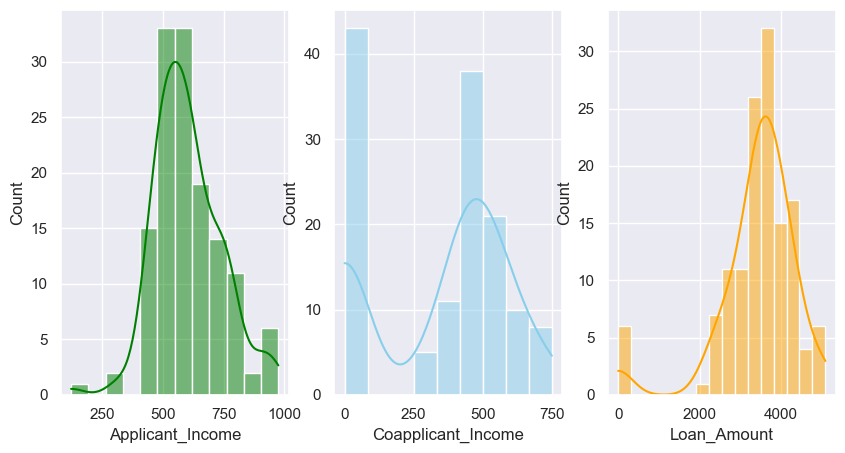

In [56]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color='green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color='skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color='orange');

We observe that the distributions after using log transformation are much better when compared to the original distribution.

## Separating target variable from the train dataset

In [57]:
train.shape

(136, 17)

In [58]:
train.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban', 'Status_Y'],
      dtype='object')

In [59]:
test.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [60]:
x = train.drop(["Status_Y"], axis = 1)
y = train["Status_Y"]

# Feature Selection

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  

feature_names=x.columns
# Create an instance of SelectKBest with the desired score function (e.g., chi2)
k_best = SelectKBest(score_func=chi2, k=9)  # Select the top 5 features

# Fit and transform the feature matrix
X_new = k_best.fit_transform(x, y)

# Get the selected feature indices
selected_features = k_best.get_support(indices=True)

# Get the names of the selected features (assuming you have a list of feature names)
selected_feature_names = [feature_names[i] for i in selected_features]



In [62]:
selected_feature_names

['Applicant_Income',
 'Coapplicant_Income',
 'Loan_Amount',
 'Married',
 'Dependents_0',
 'Education',
 'Area_Rural',
 'Area_Semiurban',
 'Area_Urban']

In [63]:
x=x[selected_feature_names]

## Dealing with Data Imbalance : SMOTE 

In [64]:
x, y = SMOTE().fit_resample(x, y)

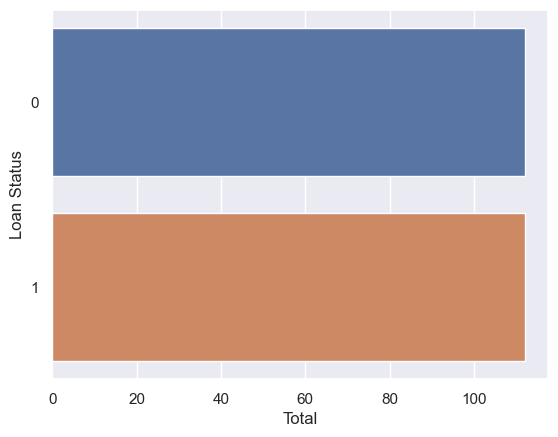

In [65]:
sns.set_theme(style = "darkgrid")
sns.countplot(y = y, data = train)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## Data Normalization

In [66]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Models

## K-Nearest Neighbour (KNN)

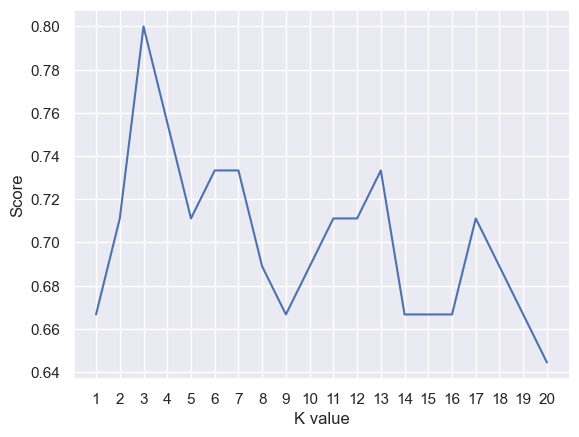

KNN best accuracy: 80.00%


In [67]:
score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score_knn.append(knn.score(x_test, y_test))
    
plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [68]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
# Metrics to evaluate
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1 Score': make_scorer(f1_score)
}

# Cross-validation
cv_results = cross_validate(knn, x_train, y_train, cv=5, scoring=scoring)

# Display results
print("Cross-validation results:")
for metric, values in cv_results.items():
    if metric != 'fit_time' and metric != 'score_time':  # Exclude fit_time and score_time
        print(f"{metric}: {np.mean(values)}")

# Train the model on the full training set
knn.fit(x_train, y_train)

# Evaluate on the test set
y_pred = knn.predict(x_test)

# Display additional metrics on the test set
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print("\nTest set metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")


Cross-validation results:
test_Accuracy: 0.6592063492063491
test_Precision: 0.7139016375781082
test_Recall: 0.576608187134503
test_F1 Score: 0.6370942140296979

Test set metrics:
Accuracy: 0.7111111111111111
Precision: 0.64
Recall: 0.8
F1 Score: 0.7111111111111111


## Naive Bayes

### Gaussian NB

In [69]:
nbc2 = GaussianNB()
nbc2.fit(x_train, y_train)

y_pred = nbc2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        25
           1       0.63      0.60      0.62        20

    accuracy                           0.67        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.67      0.67      0.67        45

[[18  7]
 [ 8 12]]
Gaussian Naive Bayes accuracy: 66.67%


In [70]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes model
nbc2 = GaussianNB()

# Metrics to evaluate
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1 Score': make_scorer(f1_score)
}

# Cross-validation
cv_results = cross_validate(nbc2, x_train, y_train, cv=5, scoring=scoring)

# Display results
print("Cross-validation results:")
for metric, values in cv_results.items():
    if metric != 'fit_time' and metric != 'score_time':  # Exclude fit_time and score_time
        print(f"{metric}: {np.mean(values)}")

# Train the model on the full training set
nbc2.fit(x_train, y_train)

# Evaluate on the test set
y_pred = nbc2.predict(x_test)

# Display additional metrics on the test set
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print("\nTest set metrics:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")


Cross-validation results:
test_Accuracy: 0.7090476190476191
test_Precision: 0.7371407402367155
test_Recall: 0.6964912280701754
test_F1 Score: 0.7106788931788931

Test set metrics:
Accuracy: 0.6666666666666666
Precision: 0.631578947368421
Recall: 0.6
F1 Score: 0.6153846153846154


## Decision Tree

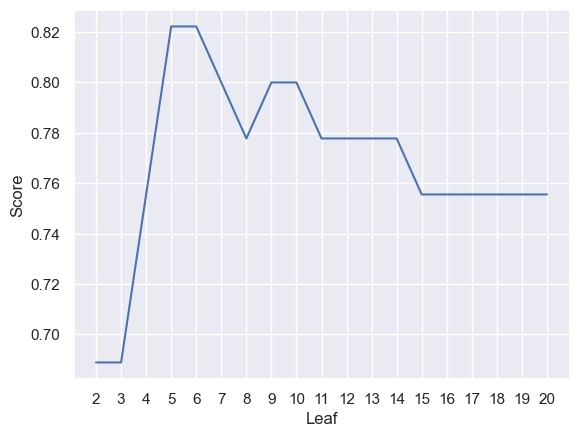

Decision Tree Accuracy: 82.22%


In [71]:
score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc.fit(x_train, y_train)
    score_dt.append(dtc.score(x_test, y_test))
    
plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(score_dt)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Metrics to evaluate
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1 Score': make_scorer(f1_score)
}

# Cross-validation
cv_results = cross_validate(dtc, x_train, y_train, cv=5, scoring=scoring)

# Display results
print("Cross-validation results:")
for metric, values in cv_results.items():
    if metric != 'fit_time' and metric != 'score_time':  # Exclude fit_time and score_time
        print(f"{metric}: {np.mean(values)}")

# Train the model on the full training set
dtc.fit(x_train, y_train)

# Evaluate on the test set
y_pred = dtc.predict(x_test)

# Display additional metrics on the test set
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("\nTest set metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")


Cross-validation results:
test_Accuracy: 0.7422222222222222
test_Precision: 0.7860859728506788
test_Recall: 0.6953216374269007
test_F1 Score: 0.73409825468649

Test set metrics:
Accuracy: 0.8
Precision: 0.7894736842105263
Recall: 0.75
F1 Score: 0.7692307692307692


## Random Forest

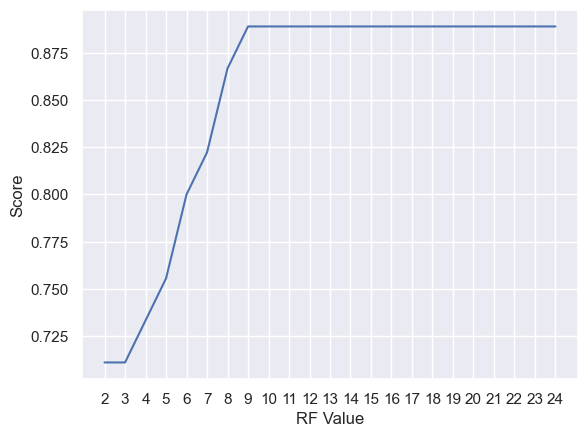

Random Forest Accuracy:  88.89%


In [73]:
score_rf = []
for i in range(2,25):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rfc.fit(x_train, y_train)
    score_rf.append(rfc.score(x_test, y_test))
    
plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [74]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=1)

# Metrics to evaluate
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1 Score': make_scorer(f1_score)
}

# Cross-validation
cv_results = cross_validate(rfc, x_train, y_train, cv=5, scoring=scoring)

# Display results
print("Cross-validation results:")
for metric, values in cv_results.items():
    if metric != 'fit_time' and metric != 'score_time':  # Exclude fit_time and score_time
        print(f"{metric}: {np.mean(values)}")

# Train the model on the full training set
rfc.fit(x_train, y_train)

# Evaluate on the test set
y_pred = rfc.predict(x_test)

# Display additional metrics on the test set
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("\nTest set metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")


Cross-validation results:
test_Accuracy: 0.7873015873015874
test_Precision: 0.8219545659019344
test_Recall: 0.7619883040935672
test_F1 Score: 0.7854661162710699

Test set metrics:
Accuracy: 0.9333333333333333
Precision: 0.9047619047619048
Recall: 0.95
F1 Score: 0.9268292682926829


# Model Comparison 

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Evaluate on the test set
y_pred_dt = dtc.predict(x_test)

# Calculate accuracy for Decision Tree
DTAcc = accuracy_score(y_test, y_pred_dt)

# Now you can include DTAcc in your comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['K Neighbors', 'Gaussian NB', 'Decision Tree', 'Random Forest'],
    'Accuracy': [knn_accuracy * 100, nb_accuracy * 100, dt_accuracy * 100, rf_accuracy * 100],
    'Recall': [knn_recall * 100, nb_recall * 100,  dt_recall * 100, rf_recall * 100],  # Update with actual recall values
    'Precision': [knn_precision * 100, nb_precision * 100, dt_precision * 100, rf_precision * 100],  # Update with actual precision values
    'F1 Score': [knn_f1 * 100, nb_f1 * 100, dt_f1 * 100, rf_f1 * 100]  # Update with actual F1 Score values
})

# Sort the DataFrame by Accuracy
comparison.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display the DataFrame
print(comparison)


           Model   Accuracy  Recall  Precision   F1 Score
3  Random Forest  93.333333    95.0  90.476190  92.682927
2  Decision Tree  80.000000    75.0  78.947368  76.923077
0    K Neighbors  71.111111    80.0  64.000000  71.111111
1    Gaussian NB  66.666667    60.0  63.157895  61.538462


In [76]:
from sklearn.metrics import log_loss
import numpy as np

def calculate_bic(y_true, y_pred_proba, num_params):
    n = len(y_true)
    log_likelihood = -log_loss(y_true, y_pred_proba, normalize=False)
    bic = -2 * log_likelihood + num_params * np.log(n)
    return bic


In [83]:

knn_pred_proba = knn.predict_proba(x_test)[:, 1]
nb_pred_proba = nbc2.predict_proba(x_test)[:, 1]
dt_pred_proba = dtc.predict_proba(x_test)[:, 1]
rf_pred_proba = rfc.predict_proba(x_test)[:, 1]


num_params_knn = 3
num_params_nb = 2 * len(nbc2.theta_[0])  
num_params_dt = len(dtc.feature_importances_) + 1  
num_params_rf = 1000  
# Calculate BIC for each model
bic_knn = calculate_bic(y_test, knn_pred_proba, num_params_knn)
bic_nb = calculate_bic(y_test, nb_pred_proba, num_params_nb)
bic_dt = calculate_bic(y_test, dt_pred_proba, num_params_dt)
bic_rf = calculate_bic(y_test, rf_pred_proba, num_params_rf)

# Create the comparison DataFrame with BIC
comparison_bic = pd.DataFrame({
    'Model': ['K Neighbors', 'Gaussian NB', 'Decision Tree', 'Random Forest'],
    'BIC': [bic_knn, bic_nb, bic_dt, bic_rf],
    'Accuracy': [knn_accuracy * 100, nb_accuracy * 100, dt_accuracy * 100, rf_accuracy * 100],
    'Recall': [knn_recall * 100, nb_recall * 100,  dt_recall * 100, rf_recall * 100],  # Update with actual recall values
    'Precision': [knn_precision * 100, nb_precision * 100, dt_precision * 100, rf_precision * 100],  # Update with actual precision values
    'F1 Score': [knn_f1 * 100, nb_f1 * 100, dt_f1 * 100, rf_f1 * 100]  # Update with actual F1 Score values
})

# Sort the DataFrame by BIC in ascending order
comparison_bic.sort_values(by='BIC', ascending=True, inplace=True)

# Display the DataFrame with BIC
print(comparison_bic)


           Model          BIC   Accuracy  Recall  Precision   F1 Score
1    Gaussian NB   120.460507  66.666667    60.0  63.157895  61.538462
0    K Neighbors   124.499826  71.111111    80.0  64.000000  71.111111
2  Decision Tree   686.852386  80.000000    75.0  78.947368  76.923077
3  Random Forest  3835.169251  93.333333    95.0  90.476190  92.682927


#### The model with the lowest BIC is the Gaussian Naive Bayes (NB) model, with a BIC value of 120.46. According to the Bayesian Information Criterion (BIC), lower values indicate a better fit, suggesting that the Gaussian NB model is the preferred choice among the models listed.

#### Therefore, based on the BIC criterion alone, the Gaussian Naive Bayes model is recommended. However, it's important to consider other factors and performance metrics (accuracy, recall, precision, F1 score) when selecting a model, as the choice may depend on the specific goals and requirements of your analysis or application.